In [1]:
import os
import math
import numpy as np
import urllib.request
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img

### In this exercise we will try out a real-life problem, here we are taking a problem of projectile motion, we all have seen such streams in real life. Can we create a mathematical formulation for the flow and train a neural network to learn the equation? 



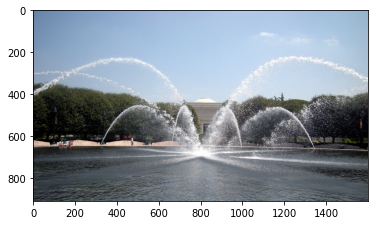

In [2]:
urllib.request.urlretrieve('https://2.bp.blogspot.com/-m-OrvgBTPgM/TdkqN1HsvlI/AAAAAAAABe0/70i8v-YGx4c/s1600/nga_fountain.jpg', 'projective_motion_example.png')
img = load_img('projective_motion_example.png')
plt.imshow(img);

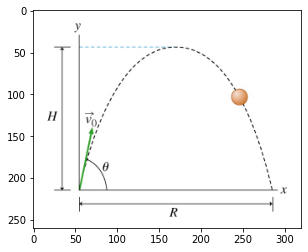

In [3]:
urllib.request.urlretrieve('https://d2vlcm61l7u1fs.cloudfront.net/media/55f/55f6eb50-c91a-4e66-aecf-924634b78a54/phpxQmk1j.png', 'projective_motion.png')
img = load_img('projective_motion.png')
plt.imshow(img);

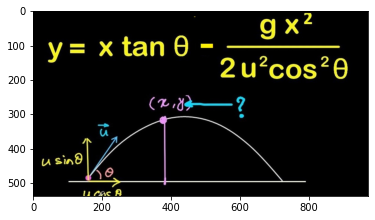

In [4]:
### Projectile motion formula
urllib.request.urlretrieve('https://i.ibb.co/K706q6Z/projectile-motion.jpg', 'projective_motion_formula.png')
img = load_img('projective_motion_formula.png')
plt.imshow(img);

input = theta, input-velocity, x <o>


output = y

In [5]:
### input to the function
theta  = 30
input_v = 10
gravity_c = 9.81
x = 0

In [6]:
def proj(theta_x,input_vel,gravity,pos_x):
  theta_x = math.radians(theta_x)
  pos_y = pos_x*(np.tan(theta_x))- ((gravity * pos_x**2)/(2*(input_vel**2)*(np.cos(theta_x)**2)))
  return(pos_y)

In [7]:
x = np.arange(0,20,.0001)
y = [proj(30,15,9.18,i) for i in x]

In [8]:
y

[0.0,
 5.773475491896258e-05,
 0.00011546896583792515,
 0.00017320263275688773,
 0.0002309357556758503,
 0.0002886683345948129,
 0.00034640036951377544,
 0.00040413186043273804,
 0.00046186280735170063,
 0.0005195932102706632,
 0.0005773230691896258,
 0.0006350523841085884,
 0.0006927811550275509,
 0.0007505093819465136,
 0.000808237064865476,
 0.0008659642037844385,
 0.0009236907987034013,
 0.0009814168496223637,
 0.0010391423565413265,
 0.001096867319460289,
 0.0011545917383792516,
 0.0012123156132982143,
 0.0012700389442171767,
 0.0013277617311361393,
 0.0013854839740551018,
 0.0014432056729740642,
 0.0015009268278930272,
 0.0015586474388119896,
 0.001616367505730952,
 0.0016740870286499148,
 0.0017318060075688772,
 0.00178952444248784,
 0.0018472423334068024,
 0.001904959680325765,
 0.0019626764832447277,
 0.00202039274216369,
 0.002078108457082653,
 0.0021358236280016154,
 0.002193538254920578,
 0.0022512523378395402,
 0.002308965876758503,
 0.0023666788716774655,
 0.0024243913225

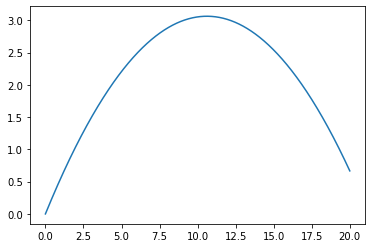

In [9]:
plt.plot(x,y)

In [10]:
y = np.array(y)

model = keras.Sequential([
    keras.layers.Dense(1, input_shape=(1,) , use_bias=True),layers.Dense(units=10,activation='softsign'),layers.Dense(units=40,activation='sigmoid'),layers.Dense(units=1)
])

model.compile(optimizer=tf.optimizers.SGD(learning_rate=0.01),
              loss='mean_squared_error',
              metrics=['mae'])

model.fit(x, y, epochs=30,validation_split=.2) 

Epoch 1/30
5000/5000 [==============================] - 6s 1ms/step - loss: 0.0863 - mae: 0.2073 - val_loss: 2.5036 - val_mae: 1.5071
Epoch 2/30
5000/5000 [==============================] - 12s 2ms/step - loss: 0.0438 - mae: 0.1648 - val_loss: 2.3371 - val_mae: 1.4525
Epoch 3/30
5000/5000 [==============================] - 17s 3ms/step - loss: 0.0387 - mae: 0.1531 - val_loss: 2.1946 - val_mae: 1.4048
Epoch 4/30
5000/5000 [==============================] - 16s 3ms/step - loss: 0.0322 - mae: 0.1372 - val_loss: 1.8652 - val_mae: 1.2875
Epoch 5/30
5000/5000 [==============================] - 16s 3ms/step - loss: 0.0182 - mae: 0.1001 - val_loss: 1.2294 - val_mae: 1.0251
Epoch 6/30
5000/5000 [==============================] - 17s 3ms/step - loss: 0.0075 - mae: 0.0667 - val_loss: 0.8598 - val_mae: 0.8404
Epoch 7/30
5000/5000 [==============================] - 17s 3ms/step - loss: 0.0038 - mae: 0.0505 - val_loss: 0.6995 - val_mae: 0.7502
Epoch 8/30
5000/5000 [==============================] - 

In [11]:
x = np.arange(0,20,.1)
y = [proj(30,15,9.18,i) for i in x]

In [12]:
model_pred = []
for i in x:
  model_pred.append(model.predict([i])[0][0])

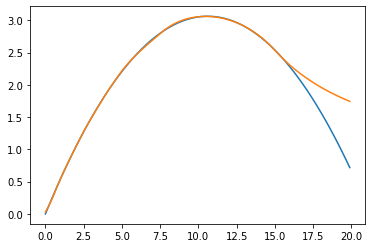

In [13]:
plt.plot(x,y)
plt.plot(x,model_pred)